In [9]:
def getPredictions(model,X_test):
    from numpy import array
    preds=model.predict(array(X_test))
    y_pred=[]
    for row in preds:
        if row[0]>row[1]:
            y_pred.append(0)
        else:
            y_pred.append(1)
    return y_pred

In [10]:
import numpy
from __future__ import division
# Function for evaluating score of the tree
def evaluate_score(clf,X,Y):
    Y_predicted=list(map(int,(clf.predict(X)).tolist()))
    correct_predicts=0
    for i in range(0,len(Y)):
        if Y[i]==Y_predicted[i]:
            correct_predicts=correct_predicts+1
    acc=(correct_predicts/len(X))*100
    return acc

In [11]:
def getModelStats(Y_test,Y_test_pred):
    true_pos,false_pos,false_neg,true_neg=0,0,0,0
    pos,neg=0,0
    for i in range(len(Y_test)):
        if Y_test[i]==0:
            pos+=1
        else:
            neg+=1
        if Y_test[i]==Y_test_pred[i]:
            if Y_test[i]==0:
                true_pos+=1
            else:
                true_neg+=1
        else:
            if Y_test[i]==0:
                false_neg+=1
            else:
                false_pos+=1
    print("Total number of positives in the set:"+str(pos))
    print("Total number of negatives in the set:"+str(neg))
    print("True Positive:"+str(true_pos))
    print("False Positive:"+str(false_pos))
    print("False Negative:"+str(false_neg))
    print("True Negative:"+str(true_neg))
    # Model statistics:
    sensitivity=(true_pos/pos)
    print("Model sensitivity is %0.4f" %sensitivity)
    specificity=(true_neg/neg)
    print("Model specificity is %0.4f" %specificity)
    precision=true_pos/(true_pos+false_pos)
    print("Model precision is %0.4f" %precision)
    f1_score=(2*true_pos)/(2*true_pos+false_pos+false_neg)
    print("Model F1 score is %0.4f" %f1_score)

In [12]:
# Loading the file
X_train=[]
Y_train=[]
input_file=open("skin-detection-training.txt","r")
for line in input_file:
    attrs=line.split(",")
    Y_train.append(int(attrs[-1].strip()))
    X_train.append(list(map(float,attrs[0:3])))
print("Number of training samples loaded:"+str(len(X_train)))
X_test=[]
Y_test=[]
input_file=open("skin-detection-testing.txt","r")
for line in input_file:
    attrs=line.split(",")
    Y_test.append(int(attrs[-1].strip()))
    X_test.append(list(map(float,attrs[0:3])))
print("Number of test samples loaded:"+str(len(X_test)))

Number of training samples loaded:209740
Number of test samples loaded:89889


Train on 188766 samples, validate on 20974 samples
Epoch 1/12
188766/188766 [==============================] - 28s 147us/step - loss: 0.1430 - acc: 0.9345 - val_loss: 0.1205 - val_acc: 0.9425
Epoch 2/12
188766/188766 [==============================] - 11s 58us/step - loss: 0.1049 - acc: 0.9507 - val_loss: 0.0942 - val_acc: 0.9552
Epoch 3/12
188766/188766 [==============================] - 10s 54us/step - loss: 0.0939 - acc: 0.9553 - val_loss: 0.0751 - val_acc: 0.9641
Epoch 4/12
188766/188766 [==============================] - 10s 52us/step - loss: 0.0785 - acc: 0.9628 - val_loss: 0.0698 - val_acc: 0.9669
Epoch 5/12
188766/188766 [==============================] - 10s 52us/step - loss: 0.0712 - acc: 0.9681 - val_loss: 0.0655 - val_acc: 0.9705
Epoch 6/12
188766/188766 [==============================] - 10s 52us/step - loss: 0.0686 - acc: 0.9689 - val_loss: 0.0625 - val_acc: 0.9725
Epoch 7/12
188766/188766 [==============================] - 10s 53us/step - loss: 0.0670 - acc: 0.9693 - val

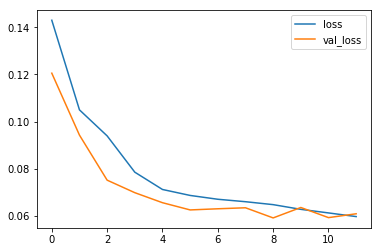

Testing accuracy: 97.1732
Training accuracy: 97.2151


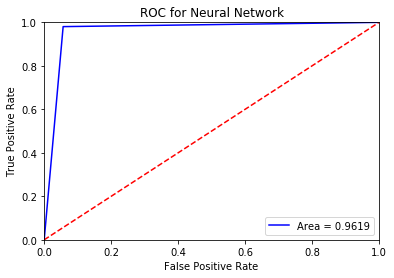

Total number of positives in the set:21078
Total number of negatives in the set:68811
True Positive:19886
False Positive:1349
False Negative:1192
True Negative:67462
Model sensitivity is 0.9434
Model specificity is 0.9804
Model precision is 0.9365
Model F1 score is 0.9399


In [19]:
# ROC for keras model:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
import matplotlib.pyplot as plt

encoder = LabelEncoder()
encoder.fit(Y_train)
enc_Y_train = encoder.transform(Y_train)
dummy_train_labels = np_utils.to_categorical(enc_Y_train)

encoder = LabelEncoder()
encoder.fit(Y_test)
enc_Y_test = encoder.transform(Y_test)
dummy_test_labels = np_utils.to_categorical(enc_Y_test)

model = Sequential()
model.add(Dense(3,input_dim=3,activation='relu', name='input_layer'))
model.add(Dense(120,activation='relu', name='hidden_layer_1'))
model.add(Dense(80,activation='relu', name='hidden_layer_2'))
model.add(Dense(40,activation='relu', name='hidden_layer_3'))
model.add(Dense(20,activation='relu', name='hidden_layer_4'))
model.add(Dense(2, activation='softmax', name='output_layer'))

# Compile model & fit data to model.
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history=model.fit(X_train,dummy_train_labels,batch_size=53,epochs=12,verbose=1,validation_split=0.1)
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()
Y_test_pred=getPredictions(model,X_test)
Y_train_pred=getPredictions(model,X_train)
corrects=0
for i in range(len(Y_test)):
    if Y_test[i]==Y_test_pred[i]:
        corrects+=1
test_acc=(corrects/len(Y_test))*100
print("Testing accuracy: %0.4f" %test_acc)
corrects=0
for i in range(len(Y_train)):
    if Y_train[i]==Y_train_pred[i]:
        corrects+=1
train_acc=(corrects/len(Y_train))*100
print("Training accuracy: %0.4f" %train_acc)
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,_=roc_curve(Y_test,Y_test_pred,pos_label=1)
roc_auc = auc(fpr, tpr)
# From here is where the graph is operated. Above this the entire calculation is for finding the False Positive Rate, True Positive Rate and the Area Under Curve
plt.title('ROC for Neural Network')
lw=2
plt.plot(fpr, tpr, color='blue', label='Area = %0.4f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
# Developing the Confusion Matrix:
getModelStats(Y_test,Y_test_pred)
# print('Saving model....\r',end='')
# to_be_saved_model = model.to_json()
# with open('model1.json','w') as model_file: model_file.write(to_be_saved_model)
# model.save_weights('weights1.h5')

Accuracy on training set:98.79755888242586
Accuracy on test set:96.3310304931638


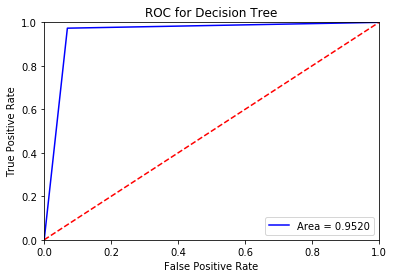

Total number of positives in the set:21078
Total number of negatives in the set:68811
True Positive:19619
False Positive:1839
False Negative:1459
True Negative:66972
Model sensitivity is 0.9308
Model specificity is 0.9733
Model precision is 0.9143
Model F1 score is 0.9225


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [16]:
# Decision Tree fitting:
from sklearn import tree
classifier=tree.DecisionTreeClassifier()
classifier.fit(X_train,Y_train)
train_score=evaluate_score(classifier,X_train,Y_train)
print("Accuracy on training set:"+str(train_score))
test_score=evaluate_score(classifier,X_test,Y_test)
print("Accuracy on test set:"+str(test_score))
# Plotting the ROC curve and finding the AuC:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
Y_test_preds=list(map(int,(classifier.predict(X_test)).tolist()))
fpr,tpr,_=roc_curve(Y_test,Y_test_preds)
roc_auc = auc(fpr, tpr)
# From here is where the graph is operated. Above this the entire calculation is for finding the False Positive Rate, True Positive Rate and the Area Under Curve
plt.title('ROC for Decision Tree')
lw=2
plt.plot(fpr, tpr, color='blue', label='Area = %0.4f' %roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
getModelStats(Y_test,Y_test_preds)
import graphviz
dot_data = tree.export_graphviz(classifier, out_file=None) 
graph = graphviz.Source(dot_data) 
graph